<a href="https://colab.research.google.com/github/Rajkumarpathakofficial/introductiontoTensorflow/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 importing tensor flow


In [1]:
import tensorflow as tf


2.15.0


The Fashion MNIST data is available directly in the tf.keras datasets API


In [2]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will giv two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

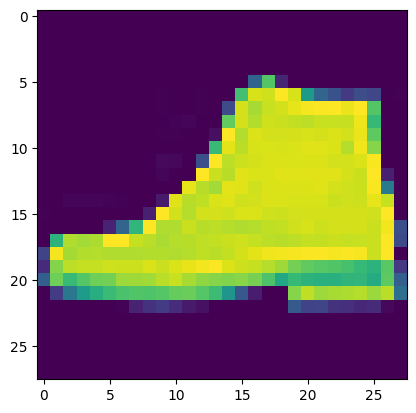

In [6]:
#seeing training images and the lables
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_labels[0])
print(training_images[0])

We can see that value are between 0 and 255 and seeing that we can assume it to be either 0 or 1
Its called normalizing and fortunately without looping python supports this and make it easier

In [ ]:

training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets...training and testing -- ? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, you're going to want to try it out with data that it hadn't previously seen!

In [7]:
#Designing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 3.0074 - accuracy: 0.6762
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7014 - accuracy: 0.7285
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6149 - accuracy: 0.7702
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5396 - accuracy: 0.8121
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5297 - accuracy: 0.8140


Here accuracy is 0.8140 which means the model looks 81 % accurate doing with 5 epochs its not bad for the first time


But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5998 - accuracy: 0.7909


[0.5998402833938599, 0.7908999919891357]

For me, that returned a accuracy of about .7909, which means it was about 79% accurate. As expected it probably would not do as well with unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.